# Feature Engineering

Feature transformation: (missing value imputation categorical variables outline detection, Feature scling)
    
Feature Construction: No Process Just Logical And Intution (Domain Knowledge)
    
Feature Selection: hold on
    
Feature Extraxtion: PCA(Principle Component Analysis)

# Curse Of Dimentionality: Features are called dimensions

Optimal Dimentions(fn) are necessary

high Dimensions lead to sparsity

# Dimenstionalty Reduction

Feature Selection: Forwade Selection, Backword Elimination
    
    
Feature Extraction:(P)

In [1]:
from abc import ABC, abstractmethod

class Shape(ABC):
    @abstractmethod
    def area(self):
        print("Hidden")
        pass

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return 3.14 * self.radius * self.radius


In [2]:
circle = Circle(10)
circle.area()

314.0

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [4]:
digit_df = pd.read_csv("train.csv")

In [5]:
digit_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
digit_df.shape

(42000, 785)

In [7]:
# Taking Any Random Sample From Dataset

digit_df.sample(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21950,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


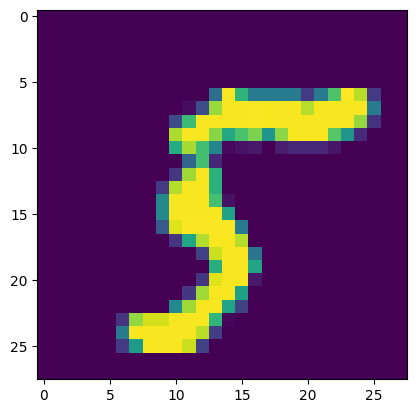

In [8]:
# Checking Sample Image 

plt.imshow(digit_df.iloc[27111,1:].values.reshape(28,28))

In [9]:
X = digit_df.iloc[:,1:]
y = digit_df.iloc[:,0]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [11]:
X_train.shape

(33600, 784)

In [12]:
# K is number of points 

knn = KNeighborsClassifier()

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
import time

start = time.time()

y_pred = knn.predict(X_test)
print(time.time() - start)

16.472349882125854


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [16]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#PCA

In [19]:

from sklearn.decomposition import PCA
pca = PCA(n_components=300)

In [20]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [21]:
# PCA Only Changes The Or Reduces The Columns It Doses Not Reduce Rows

X_train_trf.shape

(33600, 300)

In [22]:
knn = KNeighborsClassifier()

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.9391666666666667

In [26]:
#for i in range(1, 785):
for i in range(1, 1):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.fit_transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf, y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test, y_pred))

In [27]:
print("d")

d


In [28]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [29]:
X_train_trf

array([[-2.71862766, -0.49033102],
       [-0.67703328, -6.75319395],
       [-3.03321905,  6.50943726],
       ...,
       [ 2.1488386 ,  0.78133896],
       [ 1.05960074,  0.94679414],
       [17.70256902,  1.96156875]])

In [30]:
import matplotlib.pyplot as plt

In [ ]:
#!pip install plotpy

In [ ]:
#!pip install --upgrade pip


In [34]:
import plotly.express as px

y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_seqyence=px.colors.qualitative.G10)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [35]:
# 

pca = PCA(n_components =3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [36]:
X_train_trf

array([[-2.71867729, -0.49003966,  1.13568129],
       [-0.6770089 , -6.75352717, -2.33574922],
       [-3.03318043,  6.50985266,  7.49159157],
       ...,
       [ 2.14885451,  0.78104941, -0.74751573],
       [ 1.05956936,  0.94752178,  3.94952494],
       [17.70266328,  1.96204342, -4.94438747]])

In [37]:
import plotly.express as px

y_train_trf = y_train.astype(str)

fig = px.scatter_3d(digit_df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
                   color=y_train_trf)

fig.update_layout(
margin=dict(l=20,r=20, t=20, b = 20),
paper_bgcolor='LightSteelBlue')

fig.show()

ModuleNotFoundError: No module named 'plotly'

In [38]:
pca.explained_variance_

array([692.55228737, 139.53877134,  41.34548254])

In [39]:
pca.components_.shape

(3, 784)